# PollyGraph : Answering biomedical questions with large biomedical knowledge graphs

<img src="images/logo-logo.jpg" alt="Drawing" style="width: 500px;"/>

### What is PollyGraph ?

PollyGraph a.k.a ontology-driven knowledge graph is a semantic model for biomedical molecular data. 

In most organisations, big and small, information is spread out across different systems in variety of formats and contexts. As a result, users spend much time trying to manually find relevant data for their use. 

Polly, which is home to over 1.6 million biomedical molecular data, is standardised for both data and metadata. There are two major advantages to this effort. First, data standardisation using uniform file formats such as GCT, h5ad, vcf etc. enable large scale consumption of data for analysis. Second, metadata harmonisation enables users to perform data findability at scale without ever worrying to provide exact keywords for search.

To make search even more powerful for scientists, we introduce PollyGraph to perform semantic searches using several biological concepts.

### What is Semantic Search ? 

Semantic search is an advanced technology for optimizing the accuracy of our search results by enabling models to understand the meaning of concepts and the relationships between them. 

### Why do we need semantics ? 

As the data on Polly is rapidly growing in number, more and more knowledge populates the platform. Therefore, it becomes increasingly challenging for machines to process and retrieve "relevant" information on our behalf. Though it is easy for humans to decide whether two or more entities are associated, machines struggle and often fail to do it. 

### The perks of semantic-search

- It's context-aware : It identities entities that are relevant for the task and retreieves relevant datasets.
- It's extensively interlinked : Provides multiple references for an entitiy across multiple domain specific concepts and knowledge grows significantly by adding new associations between entities
- It's highly personalised : Capable of returning results that are more closely aligned with user's interests.

<img src="images/onto-text.png" alt="Drawing" style="width: 500px;"/>

## Ontology-driven Biomedical Knowledge Graphs

One of the main mechanisms behind this ability of semantic search is to utilise publicly available biomedical ontologies to provide more meaningful results using knowledge graph. Linking biomedical ontologies (e.g. MeSH, BTO, CVCL, HGNC, GO etc) by mining associations between them.

By leveraging ontologies, semantic search is able to provide a suitable response even if the results don’t contain the exact wording of the query.

<img src="images/primary_model.jpg" alt="model" style="width: 800px;"/>

### 1. Connecting to PollyGraph

In [1]:
from neo4j import GraphDatabase
import pandas as pd
import tqdm
import os
import time
from polly.auth import Polly
from polly.omixatlas import OmixAtlas
from utils import *
#from utils import find_datasets_using_term, find_datasets_using_related_terms, build_rel_query, insert_data, add_dataset, PollyGraph

Polly.auth(AUTH_TOKEN)

#Defining omixatlas object
omixatlas = OmixAtlas()

In [2]:
pollygraph = PollyGraph(uri="bolt://localhost:7687", user="neo4j", pwd="password")

### 2. Get dataset metadata from Polly

In [8]:
q = """SELECT 
              dataset_id,
              src_dataset_id, 
              src_overall_design,
              src_description,
              src_summary,
              data_type,
              curated_cell_line,
              curated_cell_type,
              curated_disease,
              curated_drug,
              curated_gene,
              curated_tissue,
              condition_column,
              condition_control,
              condition_perturbation
       FROM gdx_atlas.datasets"""

df = omixatlas.query_metadata(q, query_api_version='v2')
df.head()

Query execution succeeded (time taken: 2.37 seconds, data scanned: 2.382 MB)
Fetched 5120 rows


,dataset_id,src_dataset_id,src_overall_design,src_description,src_summary,data_type,curated_cell_line,curated_cell_type,curated_disease,curated_drug,curated_gene,curated_tissue,condition_column,condition_control,condition_perturbation
0,GSE25014_GPL570-2022-07-08-05-55-59,GSE25014_GPL570,Human pulmonary artery endothelial cells (PAEC...,Gene expression data of endothelium exposed to...,Sickle cell disease is characterized by hemoly...,Transcriptomics,[None],"[lung endothelial cell, microvascular endothe...","[Atherosclerosis, Systemic carnitine deficien...",[heme],[None],[None],kw_curated_drug,[none],[heme]
1,GSE25088_GPL1261-2022-07-08-05-56-00,GSE25088_GPL1261,3 C57Bl/6 wild-type and 3 STAT6 KO mice were u...,PPARg and IL-4-induced gene expression data fr...,C57Bl/6 wild-type and STAT6 KO mice were used ...,Transcriptomics,[None],[macrophage],[Normal],"[rosiglitazone, dimethyl sulfoxide, ethanol]","[STAT6, PPARG, IL4, FABP4, PPARA]",[bone marrow],kw_curated_drug,[none],[rosiglitazone]
2,GSE25098_GPL8321-2022-06-21-08-26-43,GSE25098_GPL8321,Contains rhabdomyosarcomas derived in vivo usi...,Rhabdomyosarcoma can be initiated in activated...,Microarray analysis of rhabdomyosarcomas gener...,Transcriptomics,[None],[progenitor cell],[Rhabdomyosarcoma],[None],"[TP53, KRAS, PAX7]",[muscle],kw_curated_disease,[Normal],[Rhabdomyosarcoma]
3,GSE25101_GPL6947-2022-06-21-08-26-44,GSE25101_GPL6947,RNA was extracted from whole blood using PAXGe...,Expression profiling in whole blood in ankylos...,Introduction: A number of genetic-association ...,Transcriptomics,[None],[None],"[Spondylitis, Ankylosing]",[None],"[EP300, SPOCK2]",[blood],kw_curated_disease,[Normal],"[Spondylitis, Ankylosing]"
4,GSE25123_GPL1261-2022-07-08-05-56-01,GSE25123_GPL1261,3 PPARg +/- LysCre and 3 PPARg fl/- LysCre mic...,PPARg and IL-4-induced gene expression data fr...,Conditional macrophage-specific PPARg knockout...,Transcriptomics,[None],[macrophage],[Normal],"[rosiglitazone, dimethyl sulfoxide, ethanol]","[STAT6, PPARG, IL4, FABP4, PPARA]",[bone marrow],kw_curated_drug,[none],[rosiglitazone]


In [67]:
query = "DESCRIBE gdx_atlas.features"
omixatlas.query_metadata(query,query_api_version='v2')

Query execution succeeded (time taken: 1.38 seconds, data scanned: 0.000 MB)
Fetched 17 rows


,column_name,column_type
0,avg_exp,double
1,p_value,double
2,src_repo,string
3,id_key,string
4,b,double
5,src_uri,string
6,gene,string
7,bh,double
8,src_dataset_id,string
9,version,bigint


### 3. Integrate Dataset Metadata on Polly with KG

In [9]:
add_dataset(df)

{'total': 5120, 'batches': 11, 'time': 11.312557220458984}

In [10]:
# Adding relationships for each dataset to biological entities
curated_columns = ['curated_cell_line', 'curated_cell_type',
                  'curated_drug', 'curated_tissue', 'curated_gene']

for index, row in tqdm.tqdm(df.iterrows()):
    index += 1
    row = df[index-1:index]
    pert_col = 'condition_perturbation'
    
    if row['condition_column'][index-1] == 'kw_curated_disease' or row['condition_column'][index-1] == 'kw_curated_drug':
        pert_field = row['condition_column'][index-1].split('_')[-1]+' '
        query = build_rel_query(pert_field, pert_col, "name", "is_perturbed_in")
        insert_data(query, row)
    
    for col in curated_columns:
        field_name = col.replace('curated_', '')
        item = row[col][index-1]
        row_df = row.explode(col)
        if col == 'curated_gene' and "".join(item).lower() != "none":
            query = build_rel_query(field_name, col, "gene_symbol", "mentioned_in")
            insert_data(query, row_df)
            
        elif col != 'curated_gene' and "".join(item).lower() != "none":
            query = build_rel_query(field_name, col, "name", "mentioned_in")
            insert_data(query, row_df)
            
        else:
            continue

5120it [10:47,  7.91it/s]


## Context-driven search examples using PollyGraph

### Q1: List genes that constitute TGF-β receptor signaling pathway that are differentially expressed in Prostate Cancer

#### NOTE: Here, Prostate Cancer is not available on the MeSH, however it is able to generate relevant datasets for the disease using ontologically relevant terms

No. of Genes: 253
No. of Diseases: 1


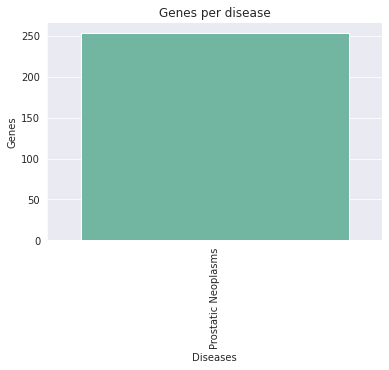

No. of Diseases: 1
No. of Pathways: 2


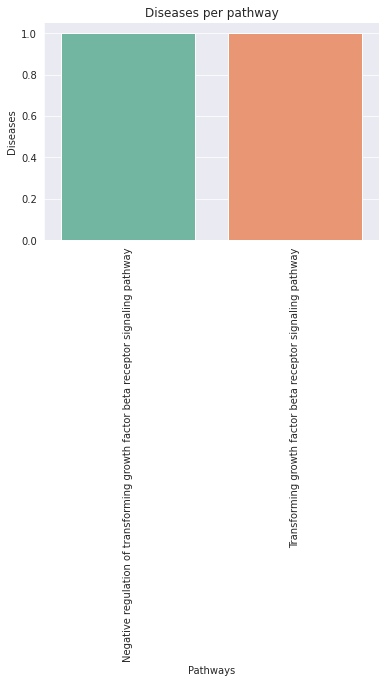

,gene,pathway,disease
0,[ALKBH5],[Negative regulation of transforming growth fa...,[Prostatic Neoplasms]
1,[TSPY26P],[Negative regulation of transforming growth fa...,[Prostatic Neoplasms]
2,[METTL1],[Negative regulation of transforming growth fa...,[Prostatic Neoplasms]
3,[STIL],[Negative regulation of transforming growth fa...,[Prostatic Neoplasms]
4,[ROR2],[Negative regulation of transforming growth fa...,[Prostatic Neoplasms]


In [20]:
query_string = '''
MATCH (n:ns0__pathway)--(m:ns0__disease)--(p:ns0__gene)
WHERE ANY (x in n.ns0__name WHERE toLower(x) CONTAINS("transforming growth factor beta receptor signaling")) AND
ANY (y in m.ns0__name+m.ns0__synonyms WHERE toLower(y) CONTAINS("prostate cancer"))
RETURN p.ns0__gene_symbol as gene, n.ns0__name as pathway, m.ns0__name as disease;
'''
top_cat_df = pd.DataFrame([dict(_) for _ in pollygraph.query(query_string)])
plot_bar('gene','disease',top_cat_df,'Genes per disease','Diseases','Genes')
plot_bar('disease','pathway',top_cat_df,'Diseases per pathway','Pathways','Diseases')
top_cat_df.head(n=5)

### Q2: Find diseases in which arginine pathways are enriched
- get_related_nodes() function - Returns output based on input given about two node types
    - Required Arguments
        - node1 - Node 1 type
        - node2 - Node 1 type
        - node1_search_term - search term to filter node 1
    - Optional Arguments
        - node2_search_term - search term to filter node 2
        - relation - relation between the two node types specified. Ex: realtion='is_enriched'
        - node1_search_properties - node1 properties used to filter using node1_search_term. By default, node1_search_properties = ['name','synonyms']
        - node2_search_properties - node2 properties used to filter using node2_search_term. By default, node1_search_properties = ['name','synonyms']
        - node1_return - node1 properties to return. By default, node1_return = ['name']
        - node2_return - node2 properties to return. By default, node1_return = ['name']

No. of Diseases: 51
No. of Pathways: 18


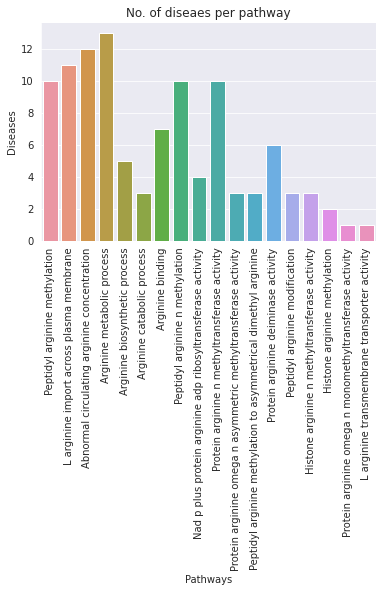

,node1_name,node2_name,relation
0,[Peptidyl arginine methylation],[Breast Neoplasms],ns0__enriched_in
1,[Peptidyl arginine methylation],"[Carcinoma, Renal Cell]",ns0__enriched_in
2,[Peptidyl arginine methylation],"[Leukemia, Myeloid, Acute]",ns0__enriched_in
3,[Peptidyl arginine methylation],[Laryngeal Neoplasms],ns0__enriched_in
4,[Peptidyl arginine methylation],"[Leukemia, Promyelocytic, Acute]",ns0__enriched_in


In [14]:
query = get_related_nodes('pathway','disease','arginine')
top_cat_df = pd.DataFrame([dict(_) for _ in pollygraph.query(query)])
plot_bar('node2_name','node1_name',top_cat_df,'No. of diseaes per pathway','Pathways','Diseases')
top_cat_df.head(n=5)

### Q3: Find datasets related to Brain Injury where BRD1 gene is regulated

In [6]:
query_string = '''
MATCH (n:ns0__disease) WHERE ANY (x in n.ns0__name + n.ns0__synonyms where toLower(x) CONTAINS("brain injury")) 
WITH n.ns0__name as disease
UNWIND disease as d
MATCH (m:ns0__gene {ns0__gene_symbol : ['BRD1']})--(n:ns0__disease {ns0__name : [d]})--(p: dataset)
RETURN p.src_dataset_id as src_dataset_id;
'''
top_cat_df = pd.DataFrame([dict(_) for _ in pollygraph.query(query_string)])
top_cat_df

""


### Q4: Fetch datasets with disease as Parkinson's disease and gene as LRRK2

In [15]:
query = """ MATCH (n:ns0__disease) WHERE ANY (x in n.ns0__name + n.ns0__synonyms where toLower(x) CONTAINS("parkinson")) 
WITH n.ns0__name as disease
UNWIND disease as d 
MATCH (m:ns0__gene {ns0__gene_symbol : ['LRRK2']})--(p: dataset)--(n:ns0__disease {ns0__name : [d]})
RETURN p.src_dataset_id as src_dataset_id,n.ns0__name as disease,m.ns0__gene_symbol as gene; 
"""
top_cat_df = pd.DataFrame([dict(_) for _ in pollygraph.query(query)])
top_cat_df.head(n=5)

,src_dataset_id,disease,gene
0,GSE33298_GPL571,[Parkinson Disease],[LRRK2]
1,GSE34516_GPL5175,[Parkinson Disease],[LRRK2]
2,GSE22491_GPL6480,[Parkinson Disease],[LRRK2]
3,GSE23290_GPL5175,[Parkinson Disease],[LRRK2]


### Q5: Find datasets using a given biological keyword
- find_datasets_using_term() function - finds datasets using a given term
    - Required Arguments
        - node_type - node type based on term Ex: node_type='tissue'
        - term - search term for filtering Ex: term='skin'
    - Optional Arguments
        - node_property - node properties used to filter using the term. By default, node_property = ['name','synonyms']

No. of Datasets: 155
No. of Terms: 3


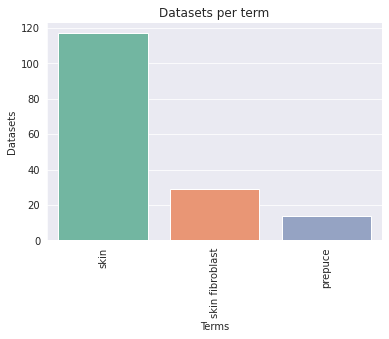

,node1_data_type,node1_dataset_id,node1_curated_disease,node1_curated_drug,node1_curated_gene,node1_curated_tissue,node1_condition_control,node1_condition_perturbation,node1_curated_cell_line,node1_curated_cell_type,node1_src_overall_design,node1_src_summary,node1_condition_column,node1_src_dataset_id,node1_src_description,term
0,Transcriptomics,GSE26934_GPL6480-2022-06-21-08-01-24,"[Myalgia, Eosinophilia-Myalgia Syndrome]",[L-tryptophan],[IL4],[skin],[Normal],[Eosinophilia-Myalgia Syndrome],[None],[None],6 samples were analyzed to include EMS patient...,Eosinophiliaâmyalgia syndrome (EMS) is chara...,kw_curated_disease,GSE26934_GPL6480,Post-epidemic eosinophilia myalgia syndrome as...,[skin]
1,Transcriptomics,GSE27041_GPL570-2022-06-21-08-01-28,"[Muscular Diseases, Muscle Hypotonia, Mitoch...",[glutathione],"[KEAP1, GADD45A]",[skin],[Normal],[Mitochondrial complex I deficiency],[None],[fibroblast],Fibroblasts were derived from skin biopsies of...,Defective complex I (CI) is the most common ty...,kw_curated_disease,GSE27041_GPL570,OXPHOS complex I deficiency leads to transcrip...,[skin]
2,Transcriptomics,GSE27349_GPL11093-2022-07-08-05-56-34,[Congenital Disorders of Glycosylation],"[1, 4-dithiothreitol]",[ATF6],[None],[none],"[1, 4-dithiothreitol]",[None],[skin fibroblast],Endoplasmic reticulum (ER) stress and the unfo...,We are currently studying how these informatio...,kw_curated_drug,GSE27349_GPL11093,Endoplasmic reticulum (ER) stress and the unfo...,[skin fibroblast]
3,Transcriptomics,GSE27355_GPL11094-2022-06-21-08-01-35,"[Neoplasm Metastasis, Melanoma]",[None],[SELP],[skin],[Normal],[Melanoma],[None],[neoplastic cell],Each group was analyzed in triplicate. The gro...,This laboratory focuses on selectin mediated r...,kw_curated_disease,GSE27355_GPL11094,Gene Expression patterns in mouse B16-OVA mela...,[skin]
4,Transcriptomics,GSE27628_GPL1261-2022-07-08-05-56-42,[Psoriasis],[imiquimod],"[AREG, KRT5, KRT14, TIE1, STAT3, TGFB1]","[skin, tail, dorsum, ear]",[none],[imiquimod],[None],[None],Expression patterns associated with mouse phen...,Development of a suitable mouse model would fa...,kw_curated_drug,GSE27628_GPL1261,Expression data from affected skin from psoria...,[skin]


In [3]:
top_cat_df = find_datasets_using_term('tissue','skin')
top_cat_df.head(n=5)

No. of Datasets: 435
No. of Terms: 30


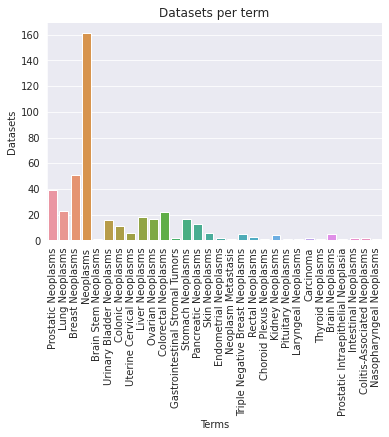

,node1_data_type,node1_dataset_id,node1_curated_disease,node1_curated_drug,node1_curated_gene,node1_curated_tissue,node1_condition_control,node1_condition_perturbation,node1_curated_cell_line,node1_curated_cell_type,node1_src_overall_design,node1_src_summary,node1_condition_column,node1_src_dataset_id,node1_src_description,term
0,Transcriptomics,GSE25140_GPL1261-2022-06-21-08-01-01,"[Amyloidosis IX, Pinta, Prostatic Intraepith...",[None],"[TP53, BMP1, PTEN, TGFA, CCND1, SMAD4, S...",[prostate gland epithelium],[Normal],[Prostatic Neoplasms],[None],[None],Prostate-specific Pten deletion (Ptenpc-/-) re...,We used microarrays to detail the global gene ...,kw_curated_disease,GSE25140_GPL1261,"Prostate specific Pten deletion, Pten-Smad4 de...",[Prostatic Neoplasms]
1,Transcriptomics,GSE25251_GPL570-2022-06-21-08-26-46,"[Carcinoma, Non-Small-Cell Lung, Corneal Dys...",[None],[None],"[lymph node, lung]",[Normal],[Lung Neoplasms],[None],[malignant cell],Establishment and Comparative Characterization...,Cell lines play an important role for studying...,kw_curated_disease,GSE25251_GPL570,Establishment and Comparative Characterization...,[Lung Neoplasms]
2,Transcriptomics,GSE25407_GPL570-2022-06-21-08-01-05,"[DNA Repair-Deficiency Disorders, Breast Neop...",[cisplatin],[RNASE1],[breast],[Normal],[Breast Neoplasms],[None],[None],Three examples of stage I breast tumor and 3 s...,Breast tumorigenesis involves modulation of ge...,kw_curated_disease,GSE25407_GPL570,Expression data from breast tumors and reducti...,[Breast Neoplasms]
3,Transcriptomics,GSE25835_GPL3921-2022-06-21-08-26-51,[Breast Neoplasms],[None],"[BRCA1, CCND1]",[breast epithelium],[Normal],[Neoplasms],[None],[mammary gland epithelial cell],Total RNA was isolated from freshly dissociate...,Microarrays were used to determine relative gl...,kw_curated_disease,GSE25835_GPL3921,Expression data from tumor and normal epitheli...,[Neoplasms]
4,Transcriptomics,GSE25858_GPL7202-2022-06-21-08-26-52,"[Colorectal Neoplasms, Muscular Dystrophy, D...",[butyric acid],[None],[colonic mucosa],[Normal],[Neoplasms],[None],[None],The differentially expressed genes were identi...,To further elucidate the mechanism of butyrate...,kw_curated_disease,GSE25858_GPL7202,Gene expression profile of butyrate mediated p...,[Neoplasms]


In [7]:
top_cat_df = find_datasets_using_term('disease','neoplasm')
top_cat_df.head(n=5)

### Q6: Find datasets for related terms
- find_datasets_using_related_term() function - finds datasets for using related search terms.
    - Required Arguments
        - node_type - node type based on term Ex: node_type='tissue'
        - term - search term for filtering Ex: term='skin'
    - Optional Arguments
        - node_property - node properties used to filter using the term. By default, node_property = ['name','synonyms']

No. of Datasets: 435
No. of Terms: 27


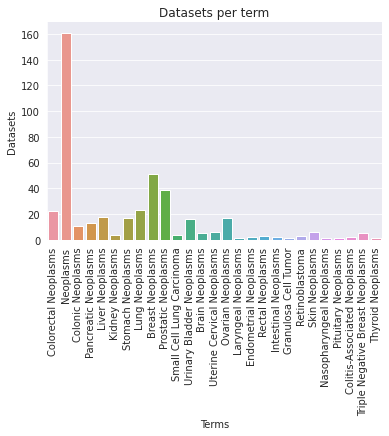

,node1_data_type,node1_dataset_id,node1_curated_disease,node1_curated_drug,node1_curated_gene,node1_curated_tissue,node1_condition_control,node1_condition_perturbation,node1_curated_cell_line,node1_curated_cell_type,node1_src_overall_design,node1_src_summary,node1_condition_column,node1_src_dataset_id,node1_src_description,term
0,Transcriptomics,GSE36091_GPL1261-2022-06-21-08-03-39,"[Adenoma, Colonic Neoplasms, Carcinoma, von...",[None],"[CCND1, HIF1A, VHL, HIF3A]",[colon],[Normal],[Colorectal Neoplasms],[None],[None],Global gene expression profiling in colon RNAs...,To identify the precise molecular mechanisms t...,kw_curated_disease,GSE36091_GPL1261,"Gene Expression profiles of colon from VhlF/F,...",[Colorectal Neoplasms]
1,Transcriptomics,GSE97689_GPL6244-2022-06-21-08-17-40,[Colorectal Neoplasms],[None],"[AQP8, CA7, PHLPP2]",[colonic mucosa],[Normal],[Colorectal Neoplasms],[None],[stem cell],Total RNA from 23 sporadic CRC patients matche...,The role of stem cells in solid tumors remains...,kw_curated_disease,GSE97689_GPL6244,Colorectal cancer initiation site,[Colorectal Neoplasms]
2,Transcriptomics,GSE84650_GPL17400-2022-06-21-08-15-03,"[Colonic Neoplasms, Carcinoma]",[tamoxifen],"[APC, ESR1, CDX2, BRAF]","[colon, cecum]",[Normal],[Colorectal Neoplasms],[None],[professional antigen presenting cell],Three colon tumor samples from 3 mice with con...,We tamoxifen treated 8-12 week old mice that h...,kw_curated_disease,GSE84650_GPL17400,"Colon tumor samples from mice with Braf V600E,...",[Colorectal Neoplasms]
3,Transcriptomics,GSE90524_GPL16956-2022-06-21-08-38-21,"[Colorectal Neoplasms, Mental Disorders, Lup...",[None],[MIR133B],[None],[Normal],[Colorectal Neoplasms],[None],[None],Microarray expression profiling of mRNAs and l...,Human colorectal cancer (CRC) is the third mos...,kw_curated_disease,GSE90524_GPL16956,Genome-wide analysis of long noncoding RNA exp...,[Colorectal Neoplasms]
4,Transcriptomics,GSE93821_GPL18635-2022-06-21-08-38-42,[Colorectal Neoplasms],[None],[None],[colorectum],[Normal],[Colorectal Neoplasms],[None],"[B cell, T cell]",Colorectal miRNA profiles of healthy mice and ...,B lymphocytes are emerging as abundant cellula...,kw_curated_disease,GSE93821_GPL18635,MicroRNA15a/16-1 represses the development of ...,[Colorectal Neoplasms]


In [9]:
top_cat_df = find_datasets_using_related_term('disease','cancer')
top_cat_df.head(n=5)

No. of Datasets: 189
No. of Terms: 3


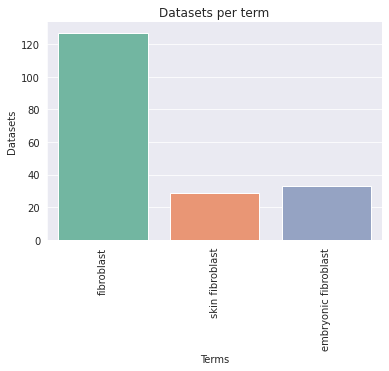

,node1_data_type,node1_dataset_id,node1_curated_disease,node1_curated_drug,node1_curated_gene,node1_curated_tissue,node1_condition_control,node1_condition_perturbation,node1_curated_cell_line,node1_curated_cell_type,node1_src_overall_design,node1_src_summary,node1_condition_column,node1_src_dataset_id,node1_src_description,term
0,Transcriptomics,GSE70818_GPL570-2022-06-21-08-35-21,[Normal],[None],[XPA],[skin],[Normal],"[Xeroderma pigmentosum, variant type]",[None],[fibroblast],Human primary fibroblasts were developed from ...,XPA is required for Nucleotide Excision Repair...,kw_curated_disease,GSE70818_GPL570,Expression data from XP-A and XP-V cells after...,[fibroblast]
1,Transcriptomics,GSE46240_GPL9185-2022-07-08-06-21-44,[Neoplasms],"[doxorubicin, aldehydo-D-glucose]","[TP73, ACAD11, TP53, TP63]",[embryo],[none],[doxorubicin],[None],[fibroblast],ChIP-seq was performed to determine the genome...,p53 is a critical tumor suppressor and works a...,kw_curated_drug,GSE46240_GPL9185,Global genomic profiling of p53-regulated genes,[fibroblast]
2,Transcriptomics,GSE45516_GPL570-2022-06-21-08-06-10,[Huntington Disease],[None],[HTT],[None],[Normal],[Huntington Disease],[None],[fibroblast],Comparison between six Huntington human fibrob...,Gene expression profile comparison from fibrob...,kw_curated_disease,GSE45516_GPL570,Expression data from human Huntington fibroblasts,[fibroblast]
3,Transcriptomics,GSE44429_GPL10904-2022-06-21-08-30-16,[Sezary Syndrome],[None],[None],[umbilical cord blood],[Normal],[Sezary Syndrome],[H9],"[fibroblast, embryonic stem cell, pluripoten...",Total RNA was harvested from (a) adult fibrobl...,Global gene expression analysis of CD31+ / CD1...,kw_curated_disease,GSE44429_GPL10904,Global gene expression analysis of vascular pr...,[fibroblast]
4,Transcriptomics,GSE43894_GPL6885-2022-07-08-06-21-29,[Normal],"[(7R, 8S)-7, 8-diaminononanoic acid, 2, 6-dia...",[DDC],[None],[none],[L-lysine],[3T3-Swiss albino],[fibroblast],Total RNA obtained from DDC-expressing 3T3 cel...,This experiment aimed to investigate whether c...,kw_curated_drug,GSE43894_GPL6885,Expression analysis of 3T3 cells that express ...,[fibroblast]


In [6]:
top_cat_df = find_datasets_using_related_term('cell_type','fibroblast')
top_cat_df.head(n=5)

### Q7: Fetch datasets with cell lines obtained from samples of a particular disease 

No. of Datasets: 43
No. of Cell lines: 22


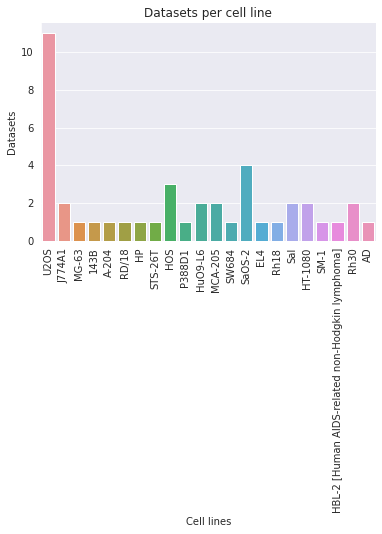

,dataset_id,cell_line
0,GSE26857_GPL4133,[U2OS]
1,GSE27277_GPL2897,[J774A1]
2,GSE28912_GPL4133,[U2OS]
3,GSE30499_GPL570,[U2OS]
4,GSE30774_GPL13497,[MG-63]


In [14]:
query = """MATCH (p:dataset)--(y:ns0__cell_line)-[r:ns0__obtained_from_sample_with_disease]-(n:ns0__disease)
WHERE ANY (x in n.ns0__synonyms + n.ns0__name where x CONTAINS("sarcoma")) 
RETURN p.src_dataset_id as dataset_id,y.ns0__name as cell_line;""" 

top_cat_df = pd.DataFrame([dict(_) for _ in pollygraph.query(query)])
plot_bar('dataset_id','cell_line',top_cat_df,'Datasets per cell line','Cell lines','Datasets')
top_cat_df.head(n=5)

### Q8: Fetch drugs that downregulate the gene TP53

No. of Drugs: 77
No. of Genes: 23


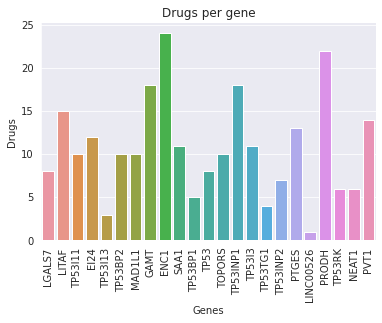

,drug,gene
0,[Sucrose],[LGALS7]
1,[Cisplatin],[LGALS7]
2,[Testosterone],[LGALS7]
3,[Rotenone],[LGALS7]
4,[Imiquimod],[LGALS7]


In [30]:
query = """MATCH (n:ns0__drug)-[r:ns0__drug_downregulates]-(m:ns0__gene)
WHERE ANY (x in m.ns0__gene_symbol + m.ns0__alias_symbol where x CONTAINS('TP53'))
RETURN n.ns0__name AS drug,m.ns0__gene_symbol as gene;"""
top_cat_df = pd.DataFrame([dict(_) for _ in pollygraph.query(query)])
plot_bar('drug','gene',top_cat_df,'Drugs per gene','Genes','Drugs')
top_cat_df.head(n=5)

### Q9: Fetch other drugs which perturb the expression of same genes as colistin

No. of Genes: 14
No. of Drugs: 15


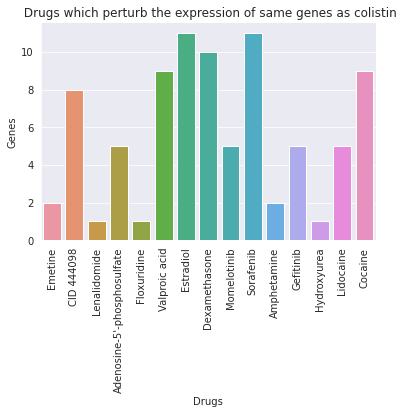

,drug1,drug1_int,gene,drug2_int,drug2
0,[Colistin],ns0__drug_upregulates,[AURKA],ns0__drug_upregulates,[Emetine]
1,[Colistin],ns0__drug_upregulates,[SOCS1],ns0__drug_upregulates,[Emetine]
2,[Colistin],ns0__drug_upregulates,[MNS1],ns0__drug_upregulates,[CID 444098]
3,[Colistin],ns0__drug_upregulates,[PBK],ns0__drug_upregulates,[CID 444098]
4,[Colistin],ns0__drug_upregulates,[AURKA],ns0__drug_upregulates,[CID 444098]


In [58]:
query = """MATCH (p:ns0__drug)-[r1]-(q:ns0__gene)-[r2]-(r:ns0__drug) 
WHERE ANY(x IN p.ns0__name + p.ns0__synonyms WHERE tolower(x) CONTAINS("colistin")) 
RETURN p.ns0__name as drug1,type(r1) as drug1_int,q.ns0__gene_symbol as gene,type(r2) as drug2_int,r.ns0__name as drug2;"""
top_cat_df = pd.DataFrame([dict(_) for _ in pollygraph.query(query)])
plot_bar('gene','drug2',top_cat_df.head(n=100),
         ' Drugs which perturb the expression of same genes as colistin','Drugs','Genes')
top_cat_df.head(n=5)

### Q10:  Datasets for a pathway (with a p-value)

In [42]:
#Will return a list for both
#assign into new dataframe and filter using desired p-value cut off
query = """MATCH (n:ns0__pathway) 
WHERE ANY (x in n.ns0__name WHERE toLower(x) CONTAINS("regulation of ras protein signal transduction")) 
RETURN n.ns0__datasets AS dataset_id,n.ns0__pval as p_value;""" 

top_cat_df = pd.DataFrame([dict(_) for _ in pollygraph.query(query)])
top_cat_df

,dataset_id,p_value
0,[GSE74737_GPL11154;GSE95863_GPL18573;GSE114374...,[0.0095981906075255;0.0250855188141391;0.00393...


### Q11: Fetch drugs that upregulate genes that are downregulated in sarcoma

No. of Genes: 4651
No. of Diseases: 14


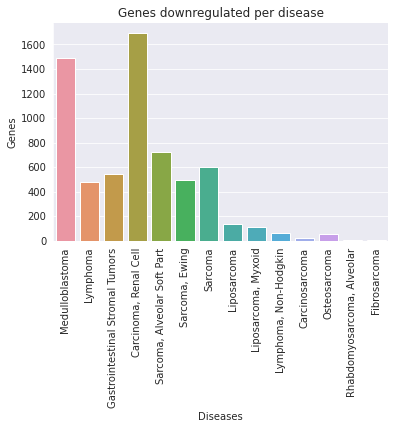

No. of Genes: 4513
No. of Drugs: 34


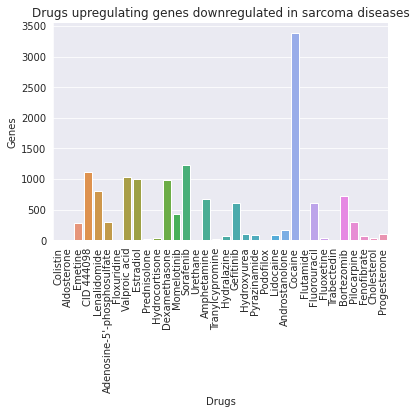

,drug,gene,disease
0,[Colistin],[MNS1],[Medulloblastoma]
1,[Colistin],[SOCS1],[Lymphoma]
2,[Aldosterone],[CPM],[Lymphoma]
3,[Aldosterone],[ADH1B],[Gastrointestinal Stromal Tumors]
4,[Aldosterone],[ADH1B],"[Carcinoma, Renal Cell]"


In [86]:
query = """MATCH (p:ns0__disease)-[:ns0__downregulates]-(q:ns0__gene)-[:ns0__drug_upregulates]-(r:ns0__drug)
WHERE ANY(x IN p.ns0__name + p.ns0__synonyms WHERE tolower(x) CONTAINS('sarcoma')) 
WITH r.ns0__name AS drug, p.ns0__name AS disease, q.ns0__gene_symbol as gene 
RETURN drug, gene, disease """

top_cat_df = pd.DataFrame([dict(_) for _ in pollygraph.query(query)])
plot_bar('gene','disease',top_cat_df,'Genes downregulated per disease','Diseases','Genes')
plot_bar('gene','drug',top_cat_df.head(n=20000),'Drugs upregulating genes downregulated in sarcoma diseases','Drugs','Genes')
top_cat_df.head(n=5)

### Q12: Finding types of relations between two node types
- The get_relation() function can be used for finding types of relations between two nodes

Node Types:
- ns0__gene
- ns0__pathway
- ns0__tissue
- ns0__cell_type
- ns0__disease
- ns0__cell_line
- ns0__drug

In [11]:
get_relation('gene','disease')

,relation_type
0,ns0__upregulates
1,ns0__downregulates


### Q13: Finding properties of a node type
- The get_node_properties() function can be used for finding properties of a node type

In [12]:
get_node_properties('gene')

,property
0,ns0__alias_symbol
1,ns0__ensembl_gene_id
2,ns0__uniprot_ids
3,ns0__alias_name
4,ns0__location_sortable
5,ns0__omim_id
6,ns0__refseq_accession
7,ns0__gene_symbol
8,ns0__mgd_id
9,ns0__ccds_id
